In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,make_scorer, precision_score, f1_score


In [2]:
df = pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

In [3]:
df.head

<bound method NDFrame.head of          Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0      Influenza   Yes    No     Yes                  Yes   19  Female   
1    Common Cold    No   Yes     Yes                   No   25  Female   
2         Eczema    No   Yes     Yes                   No   25  Female   
3         Asthma   Yes   Yes      No                  Yes   25    Male   
4         Asthma   Yes   Yes      No                  Yes   25    Male   
..           ...   ...   ...     ...                  ...  ...     ...   
344       Stroke   Yes    No     Yes                   No   80  Female   
345       Stroke   Yes    No     Yes                   No   85    Male   
346       Stroke   Yes    No     Yes                   No   85    Male   
347       Stroke   Yes    No     Yes                   No   90  Female   
348       Stroke   Yes    No     Yes                   No   90  Female   

    Blood Pressure Cholesterol Level Outcome Variable  
0              Low       

In [5]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [6]:
df.duplicated().sum()

49

In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive


In [19]:
df.reset_index(drop=True, inplace=True)

In [21]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
295,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
296,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
297,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
298,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive


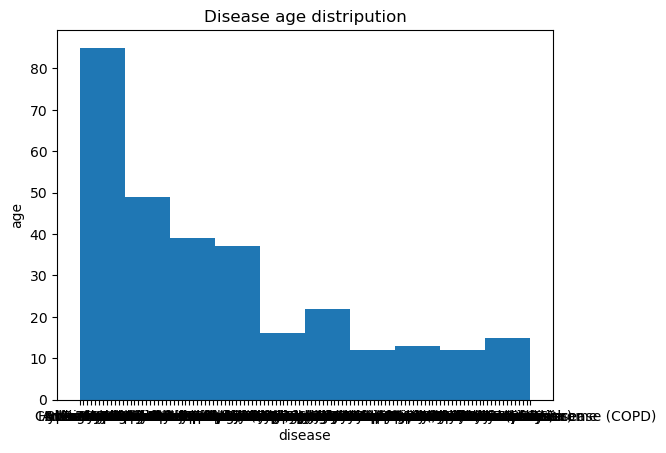

In [43]:
plt.hist(df['Disease'] ,bins='auto')
plt.xlabel('disease')
plt.ylabel('age')
plt.title('Disease age distripution')
plt.show()

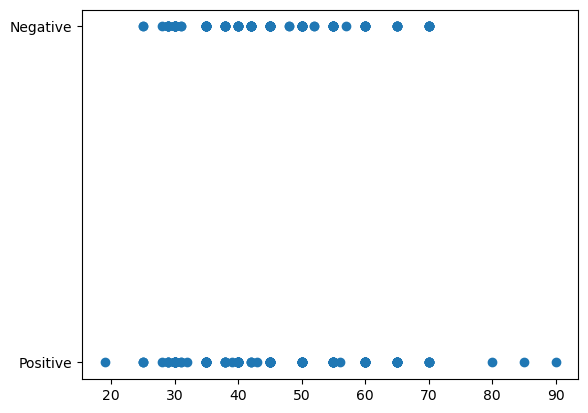

In [45]:
plt.scatter(df['Age'],df['Outcome Variable'])
plt.show()

In [52]:
x_encoder = OneHotEncoder(sparse_output=False,drop='first')
y_encoder  = LabelEncoder()

In [53]:
df['Fever'] = x_encoder.fit_transform(df[['Fever']])
df['Cough'] =x_encoder.fit_transform(df[['Cough']])
df['Fatigue'] = x_encoder.fit_transform(df[['Fatigue']])
df['Difficulty Breathing'] =x_encoder.fit_transform(df[['Difficulty Breathing']])
df['Gender'] = x_encoder.fit_transform(df[['Gender']])
df['Blood Pressure'] = x_encoder.fit_transform(df[['Blood Pressure']])
df['Cholesterol Level'] = x_encoder.fit_transform(df[['Cholesterol Level']])

C:\Users\Eng-Fawzy\AppData\Local\Temp\ipykernel_21236\413112507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fever'] = x_encoder.fit_transform(df[['Fever']])
C:\Users\Eng-Fawzy\AppData\Local\Temp\ipykernel_21236\413112507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cough'] =x_encoder.fit_transform(df[['Cough']])
C:\Users\Eng-Fawzy\AppData\Local\Temp\ipykernel_21236\413112507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [54]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1.0,0.0,1.0,1.0,19,0.0,1.0,0.0,Positive
1,Common Cold,0.0,1.0,1.0,0.0,25,0.0,0.0,0.0,Negative
2,Eczema,0.0,1.0,1.0,0.0,25,0.0,0.0,0.0,Negative
3,Asthma,1.0,1.0,0.0,1.0,25,1.0,0.0,0.0,Positive
4,Eczema,1.0,0.0,0.0,0.0,25,0.0,0.0,0.0,Positive
...,...,...,...,...,...,...,...,...,...,...
295,Tonsillitis,1.0,1.0,1.0,0.0,70,0.0,0.0,0.0,Positive
296,Williams Syndrome,0.0,0.0,1.0,0.0,70,0.0,0.0,0.0,Positive
297,Stroke,1.0,0.0,1.0,0.0,80,0.0,0.0,0.0,Positive
298,Stroke,1.0,0.0,1.0,0.0,85,1.0,0.0,0.0,Positive


In [60]:
fig = px.histogram(df, 
             x = 'Age',  
             title='Age-Disease Distribution',
             color= 'Disease'
                  )
fig.update_layout(bargap=0.2)

fig.show()

In [61]:
df['Disease'] = y_encoder.fit_transform(df[['Disease']])
df['Outcome Variable'] = y_encoder.fit_transform(df[['Outcome Variable']])

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Eng-Fawzy\AppData\Local\Temp\ipykernel_21236\448180893.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Eng-Fawzy\AppData\Local\Temp\ipykernel_21236\448180893.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a Data

In [62]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1.0,0.0,1.0,1.0,19,0.0,1.0,0.0,1
1,24,0.0,1.0,1.0,0.0,25,0.0,0.0,0.0,0
2,37,0.0,1.0,1.0,0.0,25,0.0,0.0,0.0,0
3,6,1.0,1.0,0.0,1.0,25,1.0,0.0,0.0,1
4,37,1.0,0.0,0.0,0.0,25,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
295,106,1.0,1.0,1.0,0.0,70,0.0,0.0,0.0,1
296,114,0.0,0.0,1.0,0.0,70,0.0,0.0,0.0,1
297,101,1.0,0.0,1.0,0.0,80,0.0,0.0,0.0,1
298,101,1.0,0.0,1.0,0.0,85,1.0,0.0,0.0,1


In [63]:
X = df.drop(['Outcome Variable'], axis= 1)
y = df['Outcome Variable']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [86]:
KN = KNeighborsClassifier()
LR = LogisticRegression()
DT = DecisionTreeClassifier()
svc = SVC()

In [87]:
algorithms = [KN,LR,DT,svc]

In [89]:
def compare_algorithms(X_train, y_train, algorithms, cv=5, scoring='accuracy'):
    """
    Compare the accuracies of multiple machine learning algorithms using cross-validation.

    Parameters:
    - X: Features (input variables) as a numpy array or pandas DataFrame.
    - y: Target variable as a numpy array or pandas Series.
    - algorithms: List of machine learning algorithms to compare.
    - cv: Number of cross-validation folds (default=5).
    - scoring: Evaluation metric to use (default='accuracy').

    Returns:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    accuracies = {}

    for algorithm in algorithms:
        scores = cross_val_score(algorithm, X, y, cv=cv, scoring=scoring)
        accuracies[type(algorithm).__name__] = np.mean(scores)

    return accuracies

In [90]:
def plot_accuracies(accuracies):
    """
    Plot a bar graph of accuracies for each algorithm.

    Parameters:
    - accuracies: Dictionary containing the accuracies of each algorithm.
    """

    algorithms = list(accuracies.keys())
    scores = list(accuracies.values())

    plt.figure(figsize=(10, 6))
    plt.barh(algorithms, scores, color='skyblue')
    plt.xlabel('Accuracy')
    plt.ylabel('Algorithm')
    plt.title('Accuracy of Machine Learning Algorithms')
    plt.xlim(0, 1)  # Set x-axis limits to range from 0 to 1
    plt.show()

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

h:\Machine Learning\Anaconda\lib\s

Accuracies: {'KNeighborsClassifier': 0.4766666666666667, 'LogisticRegression': 0.6066666666666667, 'DecisionTreeClassifier': 0.5800000000000001, 'SVC': 0.5066666666666666}


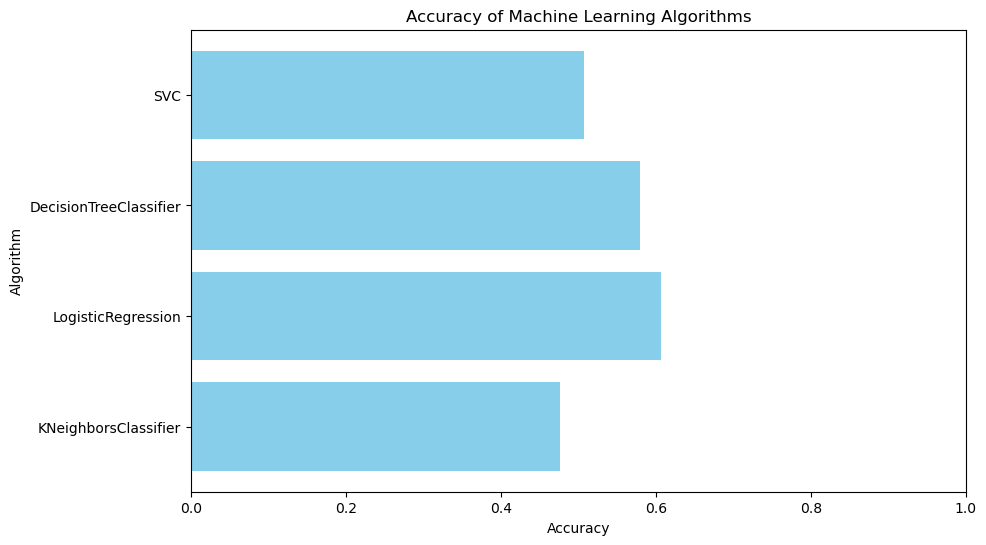

In [91]:
# Compare algorithms and plot accuracies
accuracies = compare_algorithms(X, y, algorithms)
print("Accuracies:", accuracies)
plot_accuracies(accuracies)

In [92]:
accuracies

{'KNeighborsClassifier': 0.4766666666666667,
 'LogisticRegression': 0.6066666666666667,
 'DecisionTreeClassifier': 0.5800000000000001,
 'SVC': 0.5066666666666666}

In [93]:
#Time to evaluate our model with logistic regression
model = LR.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
accuracy

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.6833333333333333

In [100]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.31666666666666665


In [109]:
# Define the parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2','13']}
# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(LR, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

h:\Machine Learning\Anaconda\lib\s

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2', '13']},
             scoring='accuracy')

In [110]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.6541666666666667


In [111]:
# Evaluate the model using cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')

# Compute F1 score and precision using cross-validation
f1_scorer = make_scorer(f1_score, average='weighted')
precision_scorer = make_scorer(precision_score, average='weighted')
f1_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=f1_scorer)
precision_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring=precision_scorer)

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

h:\Machine Learning\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

h:\Machine Learning\Anaconda\lib\s

In [112]:
# Print the mean F1 score and precision
print("Mean F1 Score (Cross-Validation):", f1_scores.mean())
print("Mean Precision (Cross-Validation):", precision_scores.mean())

Mean F1 Score (Cross-Validation): 0.6434394645374888
Mean Precision (Cross-Validation): 0.6481891076323001


In [113]:
y_pred_test = grid_search.best_estimator_.predict(X_test)

# Compute F1 score and precision on the test data
f1_test = f1_score(y_test, y_pred_test, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

# Print the F1 score and precision on the test data
print("F1 Score (Test Data):", f1_test)
print("Precision (Test Data):", precision_test)

F1 Score (Test Data): 0.682004662004662
Precision (Test Data): 0.6841251885369533
